# Import libraries

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Read Dataset 

In [ ]:
df=pd.read_csv("../gamzebaysallar/documents/Travel.csv")
df.head()


FileNotFoundError: ignored

**CustomerID**            :Unique customer ID <br>
**ProdTaken**             :Taking of Package <br>
**Age**                   :Age of customer <br>
**TypeofContact**        :How customer was contacted <br>
**CityTier**             :Development of a city, population, facilities, and living standards.The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. // the city of consumer lives<br>
**DurationOfPitch**       :Duration of the pitch by a salesperson to the customer<br>
**Occupation**            :Occupation of customer<br>
**Gender**                :Gender of customer<br>
**NumberOfPersonVisiting**:Total number of persons planning to take the trip with the customer<br>
**NumberOfFollowups**     :Total number of follow-ups has been done by the salesperson after the sales pitch<br>
**ProductPitched**        :Type of Package<br>
**PreferredPropertyStar** :Preferred propert star by customer<br>
**MaritalStatus**         :Marital status of customer<br>
**NumberOfTrips**         :Number of trips made by customer before<br>
**Passport**              :Having a passport <br>
**PitchSatisfactionScore**:Pitch Satisfaction Score<br>
**OwnCar**               :Having a own car<br>
**NumberOfChildrenVisiting**:Total number of children planning to take the trip with the customer<br>
**Designation**	          :Who designed the package<br>
**MonthlyIncome**         :Monthly income of customer<br>

# Explarotary Data Analysis

1.   List item
2.   List item



In [ ]:
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

When we look at the dataset there are 19 column which consist of 7 float64,7 

*   List item
*   List item

İnt64 and 6 object.

# Check the missing values

In [ ]:
df.isnull().sum().mean()   # Shows the number of missing values in each column.

NameError: ignored

As we can see here there are several feature sets with missing values.Below you can see the percentage of missings in corrresponding feature.

In [ ]:
total_cells = np.product(df.shape)         #how much the missing data is as a percentage (%)
total_missing = (df.isnull().sum()).sum()
print('total missing value:'+ str((total_missing/total_cells)))

print('missing value of age:'+ str(226/4888)) 
print('missing value of pitch:'+ str(251/4888))
print('missing value of ıncome:'+ str(233/4888))

total missing value:0.0103518821603928
missing value of age:0.046235679214402615
missing value of pitch:0.05135024549918167
missing value of ıncome:0.04766775777414075


In [ ]:
df.duplicated().value_counts()          # I looked at the ıf there is any duplicated value.


False    4888
dtype: int64

<AxesSubplot:>

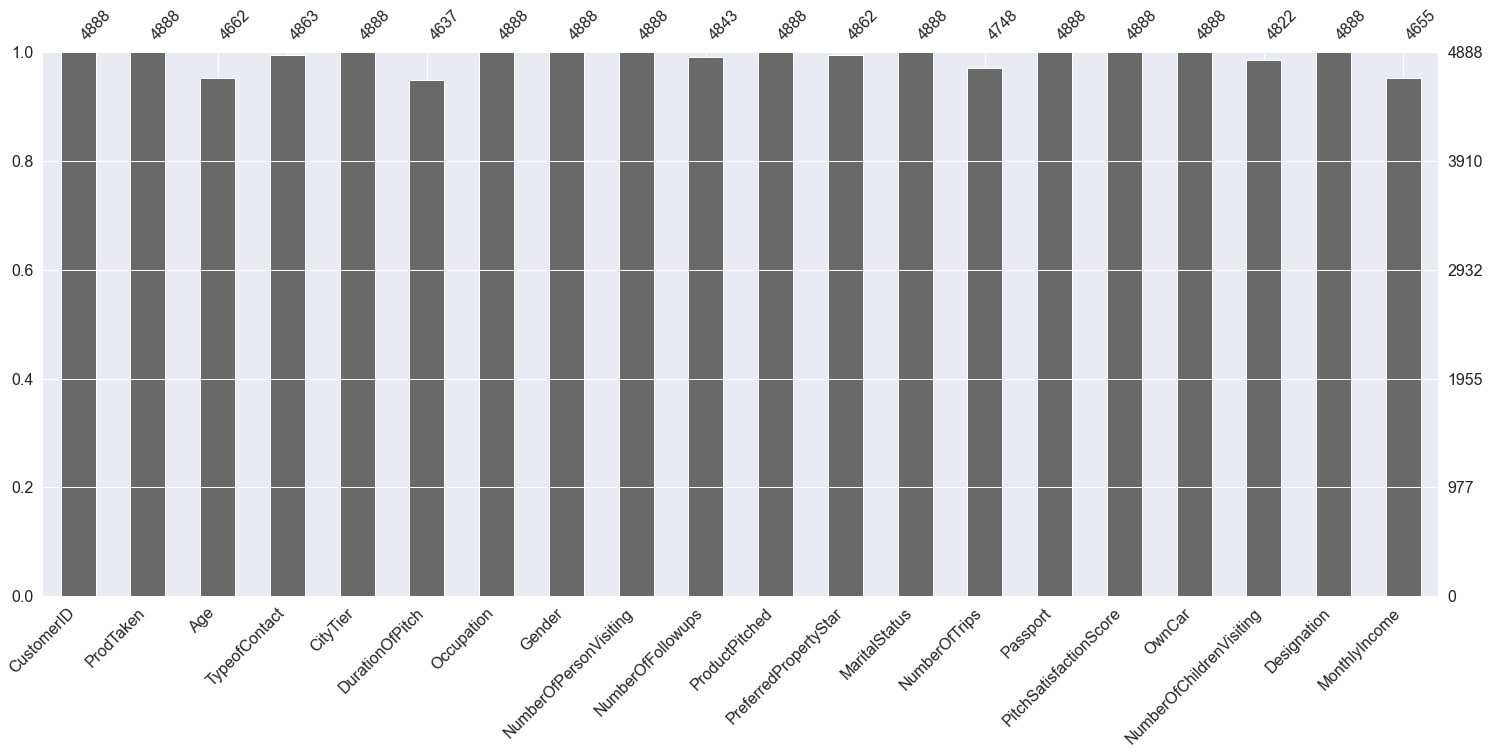

In [ ]:
msno.bar(df)            # To look relationship between missing values I import "missingno" library and I use some methods to understand better.

Here we can see the mssing data sets for each column above.

<AxesSubplot:>

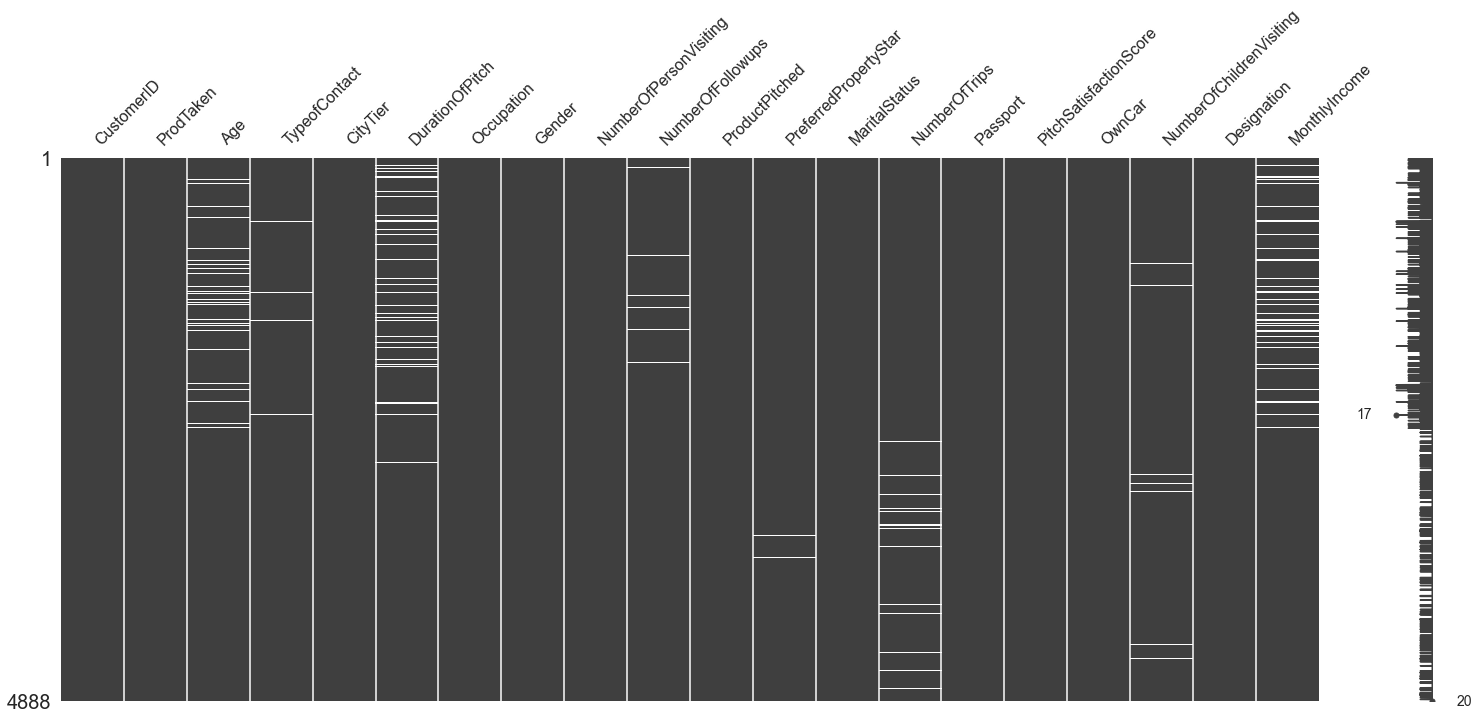

In [ ]:
msno.matrix(df)       

Showing missing values in each row. When we look at this matrix The missing values in different columns seem to be in the same row in summary there might be a correlation or dependency in between missingness of columns. In order to understand that we looked at their correlation heatmap below if there is a relationship between missing values.

<AxesSubplot:>

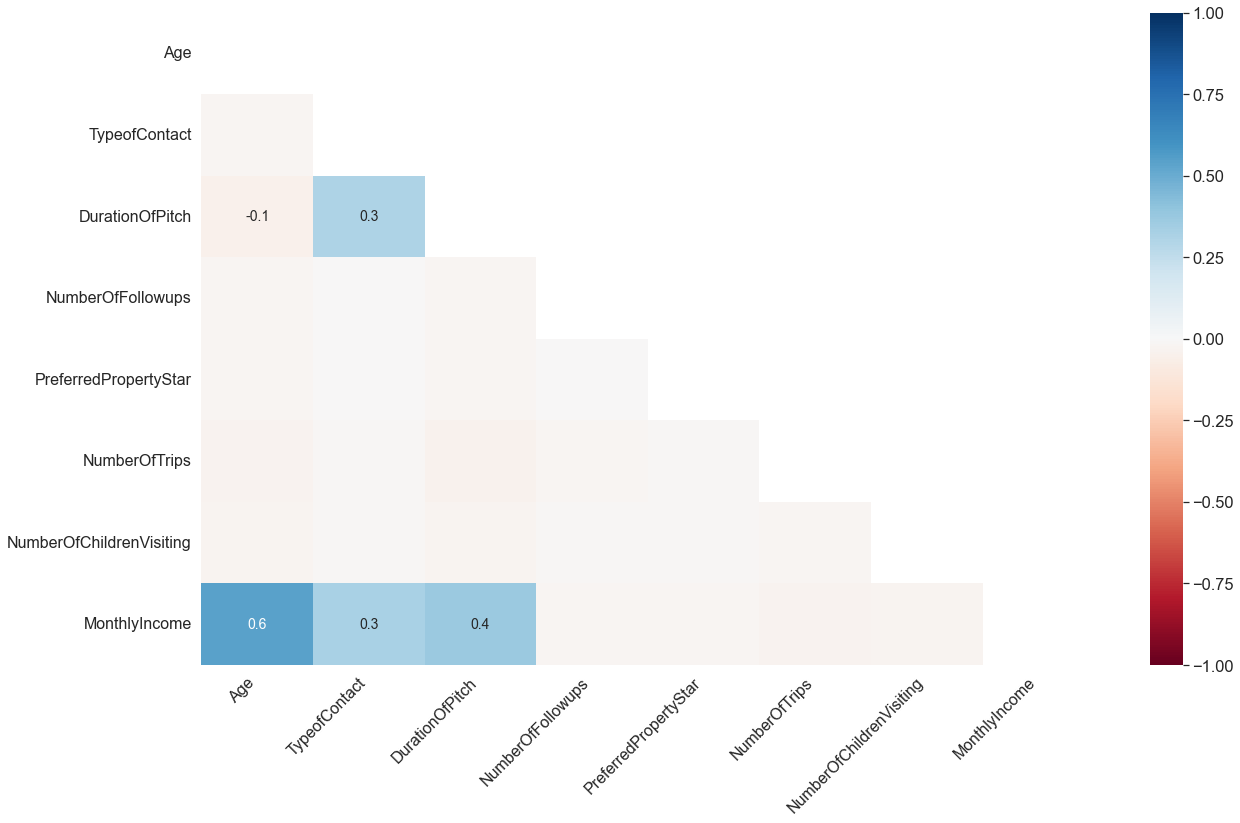

In [ ]:
msno.heatmap(df)   

According to heatmap in the above, there is a positive correlation between age and monthly income as a missng value.We can say those who do not tell their age are generally those who do not tell their income. So , this missing values is MAR.

There is no correlation between other missing values(MCAR). What it means is what is says:  the propensity for a data point to be missing is completely random.There’s no relationship between whether a data point is missing and any values in the data set, missing or observed.

In [ ]:
df.describe() #numerical variables

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


Here we are observing the number of unique values for each numerical features and their mean,standard deviation,min and max value in corresponding category.

In [ ]:
df.describe(include=['O']) #categorical variables

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


Here we are observing the number of unique values for each categorical features and their most frequent values in corresponding category.

> Indented block



In [ ]:
correlation=df.corr()

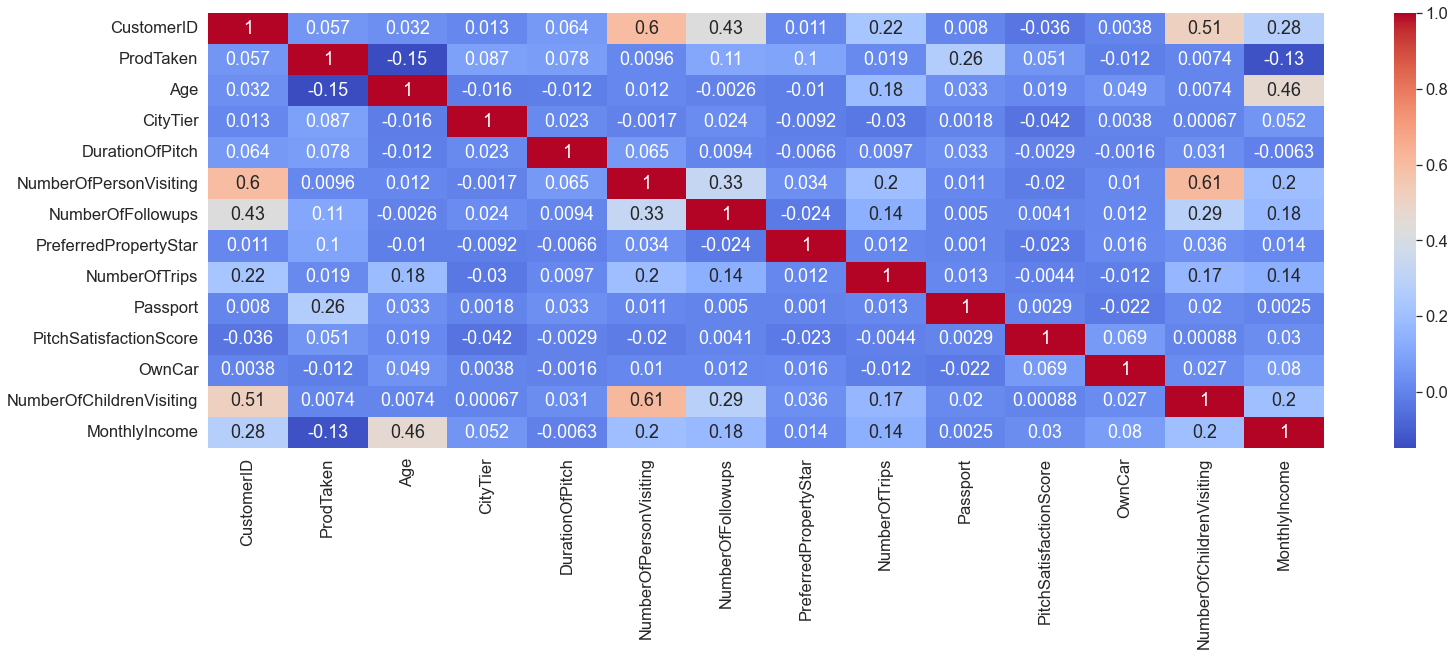

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),cmap = 'coolwarm',annot=True)  
plt.gcf().set_size_inches(25, 8)

What we are seeing in this correaltion heatmap is that, we have not seen any critical column that affects ProdTaken target column directly. However, passport, age and monthlyincome might show some effect if we observe them individually please check below.

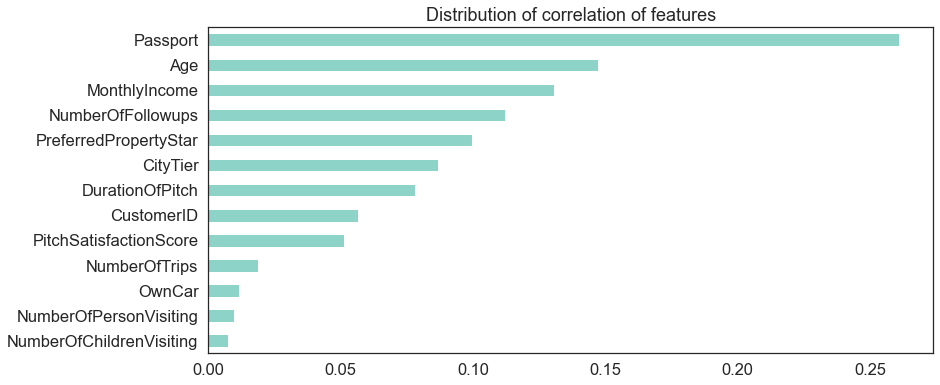

In [ ]:
sns.set_style('white')
sns.set_palette('Set3')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['ProdTaken']).sort_values()[:-1].plot.barh()
plt.show()


Although in above graph passport is the most correlated with the product taken, this rate,0.25, is low.So it is hard to state that it has significant effect on prodtaken but it might have.

# Data Preprocessing

In [ ]:
df.pop("CustomerID")       # To drop primer key.      

0       200000
1       200001
2       200002
3       200003
4       200004
         ...  
4883    204883
4884    204884
4885    204885
4886    204886
4887    204887
Name: CustomerID, Length: 4888, dtype: int64

This is primary key so each row has its own unique number, which will not be logical to use in a Machine learning classifier.

In [ ]:
for col in df:                   # to see unique value in all column , I use for loop .
    print(col,':',df[col].unique())

ProdTaken : [1 0]
Age : [41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]
TypeofContact : ['Self Enquiry' 'Company Invited' nan]
CityTier : [3 1 2]
DurationOfPitch : [  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]
Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender : ['Female' 'Male']
NumberOfPersonVisiting : [3 2 1 4 5]
NumberOfFollowups : [ 3.  4.  2.  5. nan  1.  6.]
ProductPitched : ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
PreferredPropertyStar : [ 3.  4.  5. nan]
MaritalStatus : ['Single' 'Divorced' 'Married' 'Unmarried']
NumberOfTrips : [ 1.  2.  7.  5.  6.  3.  4. 19. 21.  8. nan 20. 22.]
Passport : [1 0]
PitchSatisfactionScore : [2 3 5 4 1]
OwnCar : [1 0]
NumberOfChildrenVisitin

We are checking above that unique values for each column. The aspect here is to detect illogical values that may harm the modelling.It is seen there are "nan" values in many columns.

In [ ]:
df.groupby('Gender').size() 

Gender
Fe Male     155
Female     1817
Male       2916
dtype: int64

As we see in the array list variable of 'Fe-male' is possibly wrong. Thus, we have to correct it. 

In [ ]:
df['Gender'].replace("Fe Male","Female",inplace=True )
df['Gender'].unique()   

array(['Female', 'Male'], dtype=object)

To deal with the missing values I considered two different scenarios, I filled nan values with the average(mean) for numerical missed values and high frequency(mode) used values for the categorical. ones.DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips and NumberOfChildrenVisiting are seen numerical variable but their value change ordinally which means their type are categorical. 


Text(0.5, 1.0, 'MonthlyIncome')

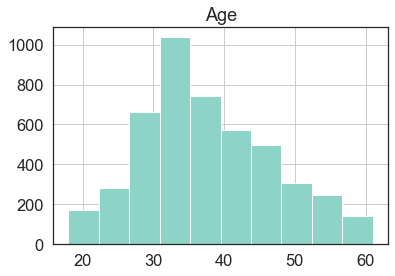

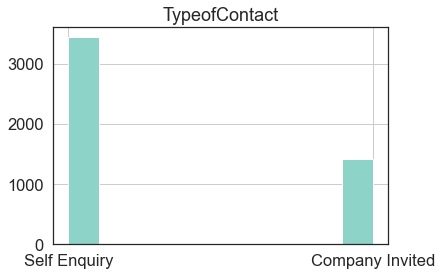

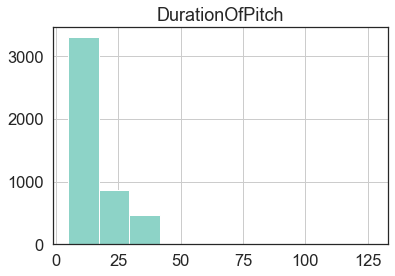

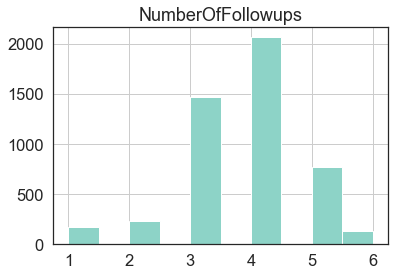

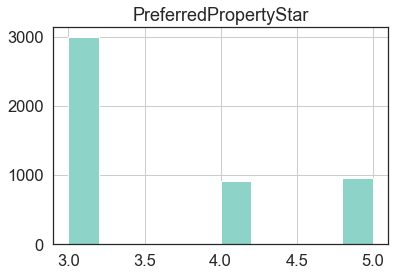

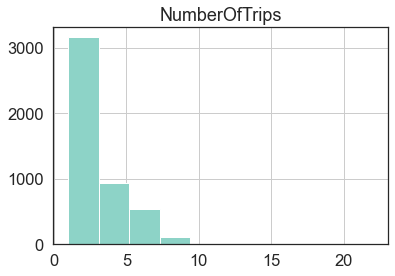

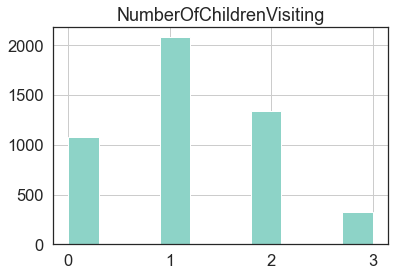

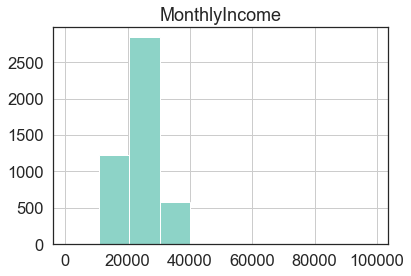

In [ ]:
df['Age'].hist()
plt.title('Age')
plt.figure()
df['TypeofContact'].hist()
plt.title('TypeofContact')
plt.figure()
df['DurationOfPitch'].hist()
plt.title('DurationOfPitch')
plt.figure()
df['NumberOfFollowups'].hist()
plt.title('NumberOfFollowups')
plt.figure()
df['PreferredPropertyStar'].hist()
plt.title('PreferredPropertyStar')
plt.figure()
df['NumberOfTrips'].hist()
plt.title('NumberOfTrips')
plt.figure()
df['NumberOfChildrenVisiting'].hist()
plt.title('NumberOfChildrenVisiting')
plt.figure()
df['MonthlyIncome'].hist()
plt.title('MonthlyIncome')


Text(0.5, 1.0, 'MonthlyIncome')

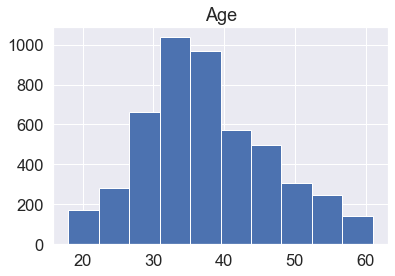

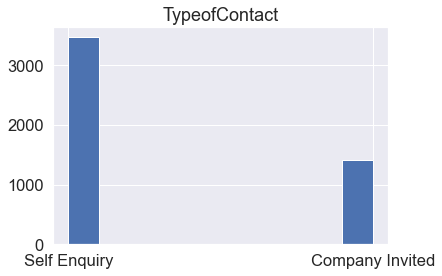

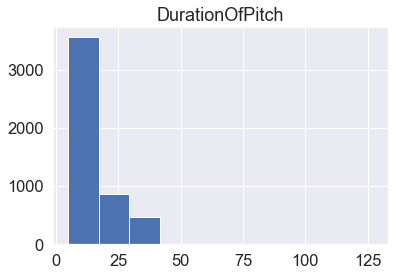

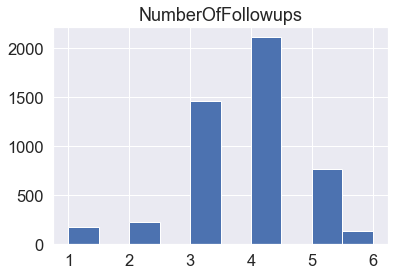

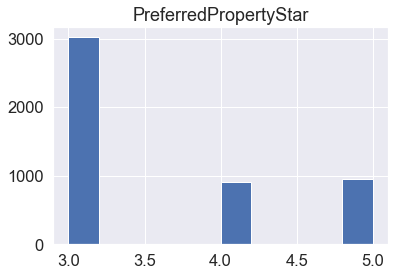

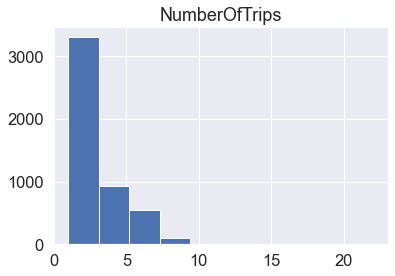

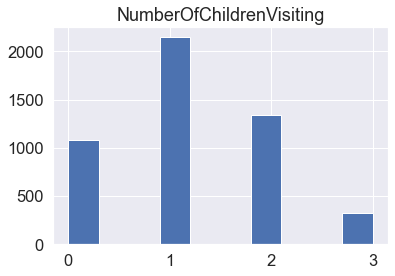

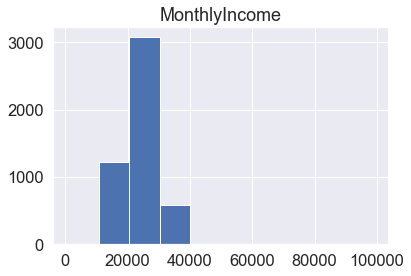

In [ ]:
dfx = df.copy()    
dfx['Age'].fillna(df['Age'].median(),inplace=True)
dfx['TypeofContact'].fillna(df['TypeofContact'].mode().iloc[0],inplace=True)
dfx['DurationOfPitch'].fillna(df['DurationOfPitch'].mode().iloc[0],inplace=True)
dfx['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode().iloc[0],inplace=True)
dfx['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode().iloc[0],inplace=True)
dfx['NumberOfTrips'].fillna(df['NumberOfTrips'].mode().iloc[0],inplace=True)
dfx['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode().iloc[0],inplace=True)
dfx['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)
                            
dfx['Age'].hist()
plt.title('Age')
plt.figure()
dfx['TypeofContact'].hist()
plt.title('TypeofContact')
plt.figure()
dfx['DurationOfPitch'].hist()
plt.title('DurationOfPitch')
plt.figure()
dfx['NumberOfFollowups'].hist()
plt.title('NumberOfFollowups')
plt.figure()
dfx['PreferredPropertyStar'].hist()
plt.title('PreferredPropertyStar')
plt.figure()
dfx['NumberOfTrips'].hist()
plt.title('NumberOfTrips')
plt.figure()
dfx['NumberOfChildrenVisiting'].hist()
plt.title('NumberOfChildrenVisiting')
plt.figure()
dfx['MonthlyIncome'].hist()
plt.title('MonthlyIncome')

Since the age distribution right skewed we used the median value for imputatation of the missing values of numerical columns.  We used median because, it works better with skewed data. After the imputation we can see the probability density curves of original data set and the imputed one are very close to each other.
It is seen in the kde graphs below there is no difference between original column distribution and imputed ones. Thus, the imputated data frame can be used for further analysis in this article without any dilemma because it represents the original data. 

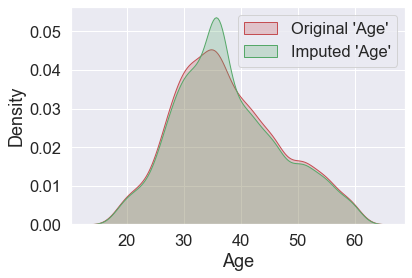

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.Age, shade=True, color="r", label="Original 'Age'")
sns.kdeplot(dfx.Age, shade=True, color="g", label="Imputed 'Age'")
plt.legend(loc='upper right')
plt.show()


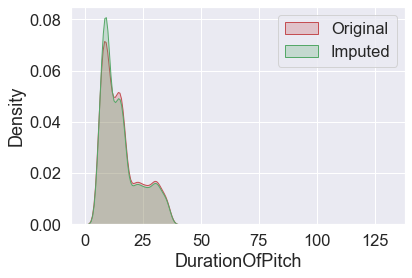

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.DurationOfPitch, shade=True, color="r", label="Original")
sns.kdeplot(dfx.DurationOfPitch, shade=True, color="g", label="Imputed")
plt.legend(loc='upper right')
plt.show()


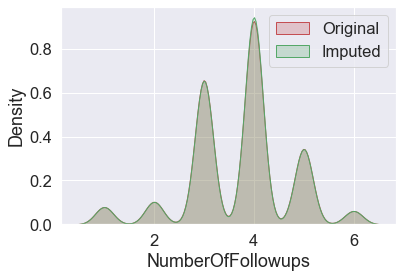

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.NumberOfFollowups, shade=True, color="r", label="Original")
sns.kdeplot(dfx.NumberOfFollowups, shade=True, color="g", label="Imputed")
plt.legend(loc='upper right')
plt.show()

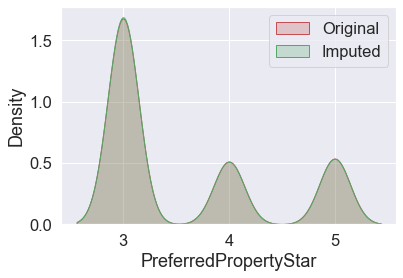

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.PreferredPropertyStar, shade=True, color="r", label="Original")
sns.kdeplot(dfx.PreferredPropertyStar, shade=True, color="g", label="Imputed")
plt.legend(loc='upper right')
plt.show()

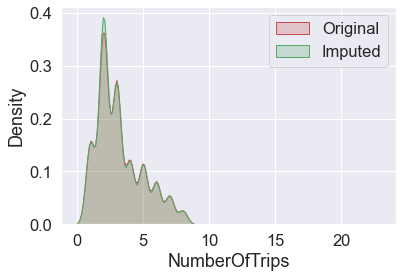

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.NumberOfTrips, shade=True, color="r", label="Original")
sns.kdeplot(dfx.NumberOfTrips, shade=True, color="g", label="Imputed")
plt.legend(loc='upper right')
plt.show()

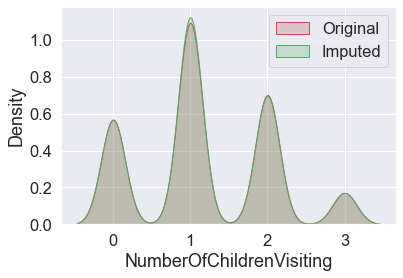

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.NumberOfChildrenVisiting, shade=True, color="r", label="Original")
sns.kdeplot(dfx.NumberOfChildrenVisiting, shade=True, color="g", label="Imputed")
plt.legend(loc='upper right')
plt.show()

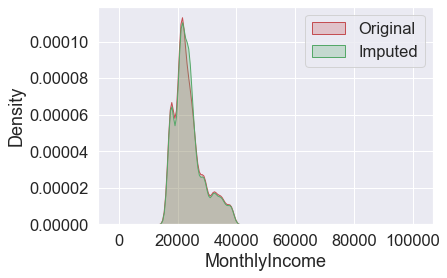

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.MonthlyIncome, shade=True, color="r", label="Original")
sns.kdeplot(dfx.MonthlyIncome, shade=True, color="g", label="Imputed")
plt.legend(loc='upper right')
plt.show()

Since the data set right skewed we used the median value for imputatation of the missing values of numerical columns.  We used median because, it works better with skewed data. After the imputation we can see the probability density curves of original data set and the imputed one are very close to each other. Thus, the imputated data frame can be used for further analysis in this article without any dilemma because it represents the orignal data. 

In [ ]:
dfx.isnull().sum()       # control 

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [ ]:
for col in dfx:                   # I controlled the unique values after imputation. .
    print(col,':',dfx[col].unique())
    
    

    

ProdTaken : [1 0]
Age : [41. 49. 37. 33. 36. 32. 59. 30. 38. 35. 31. 34. 28. 29. 22. 53. 21. 42.
 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58. 20.
 25. 19. 57. 52. 47. 18. 60. 61.]
TypeofContact : ['Self Enquiry' 'Company Invited']
CityTier : [3 1 2]
DurationOfPitch : [  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  24.  35.  28.  20.  26.  34.  23.
   5.  19. 126.   7.  36. 127.]
Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender : ['Female' 'Male']
NumberOfPersonVisiting : [3 2 1 4 5]
NumberOfFollowups : [3. 4. 2. 5. 1. 6.]
ProductPitched : ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
PreferredPropertyStar : [3. 4. 5.]
MaritalStatus : ['Single' 'Divorced' 'Married' 'Unmarried']
NumberOfTrips : [ 1.  2.  7.  5.  6.  3.  4. 19. 21.  8. 20. 22.]
Passport : [1 0]
PitchSatisfactionScore : [2 3 5 4 1]
OwnCar : [1 0]
NumberOfChildrenVisiting : [0. 2. 1. 3.]
Designation : ['

# Categorical Features

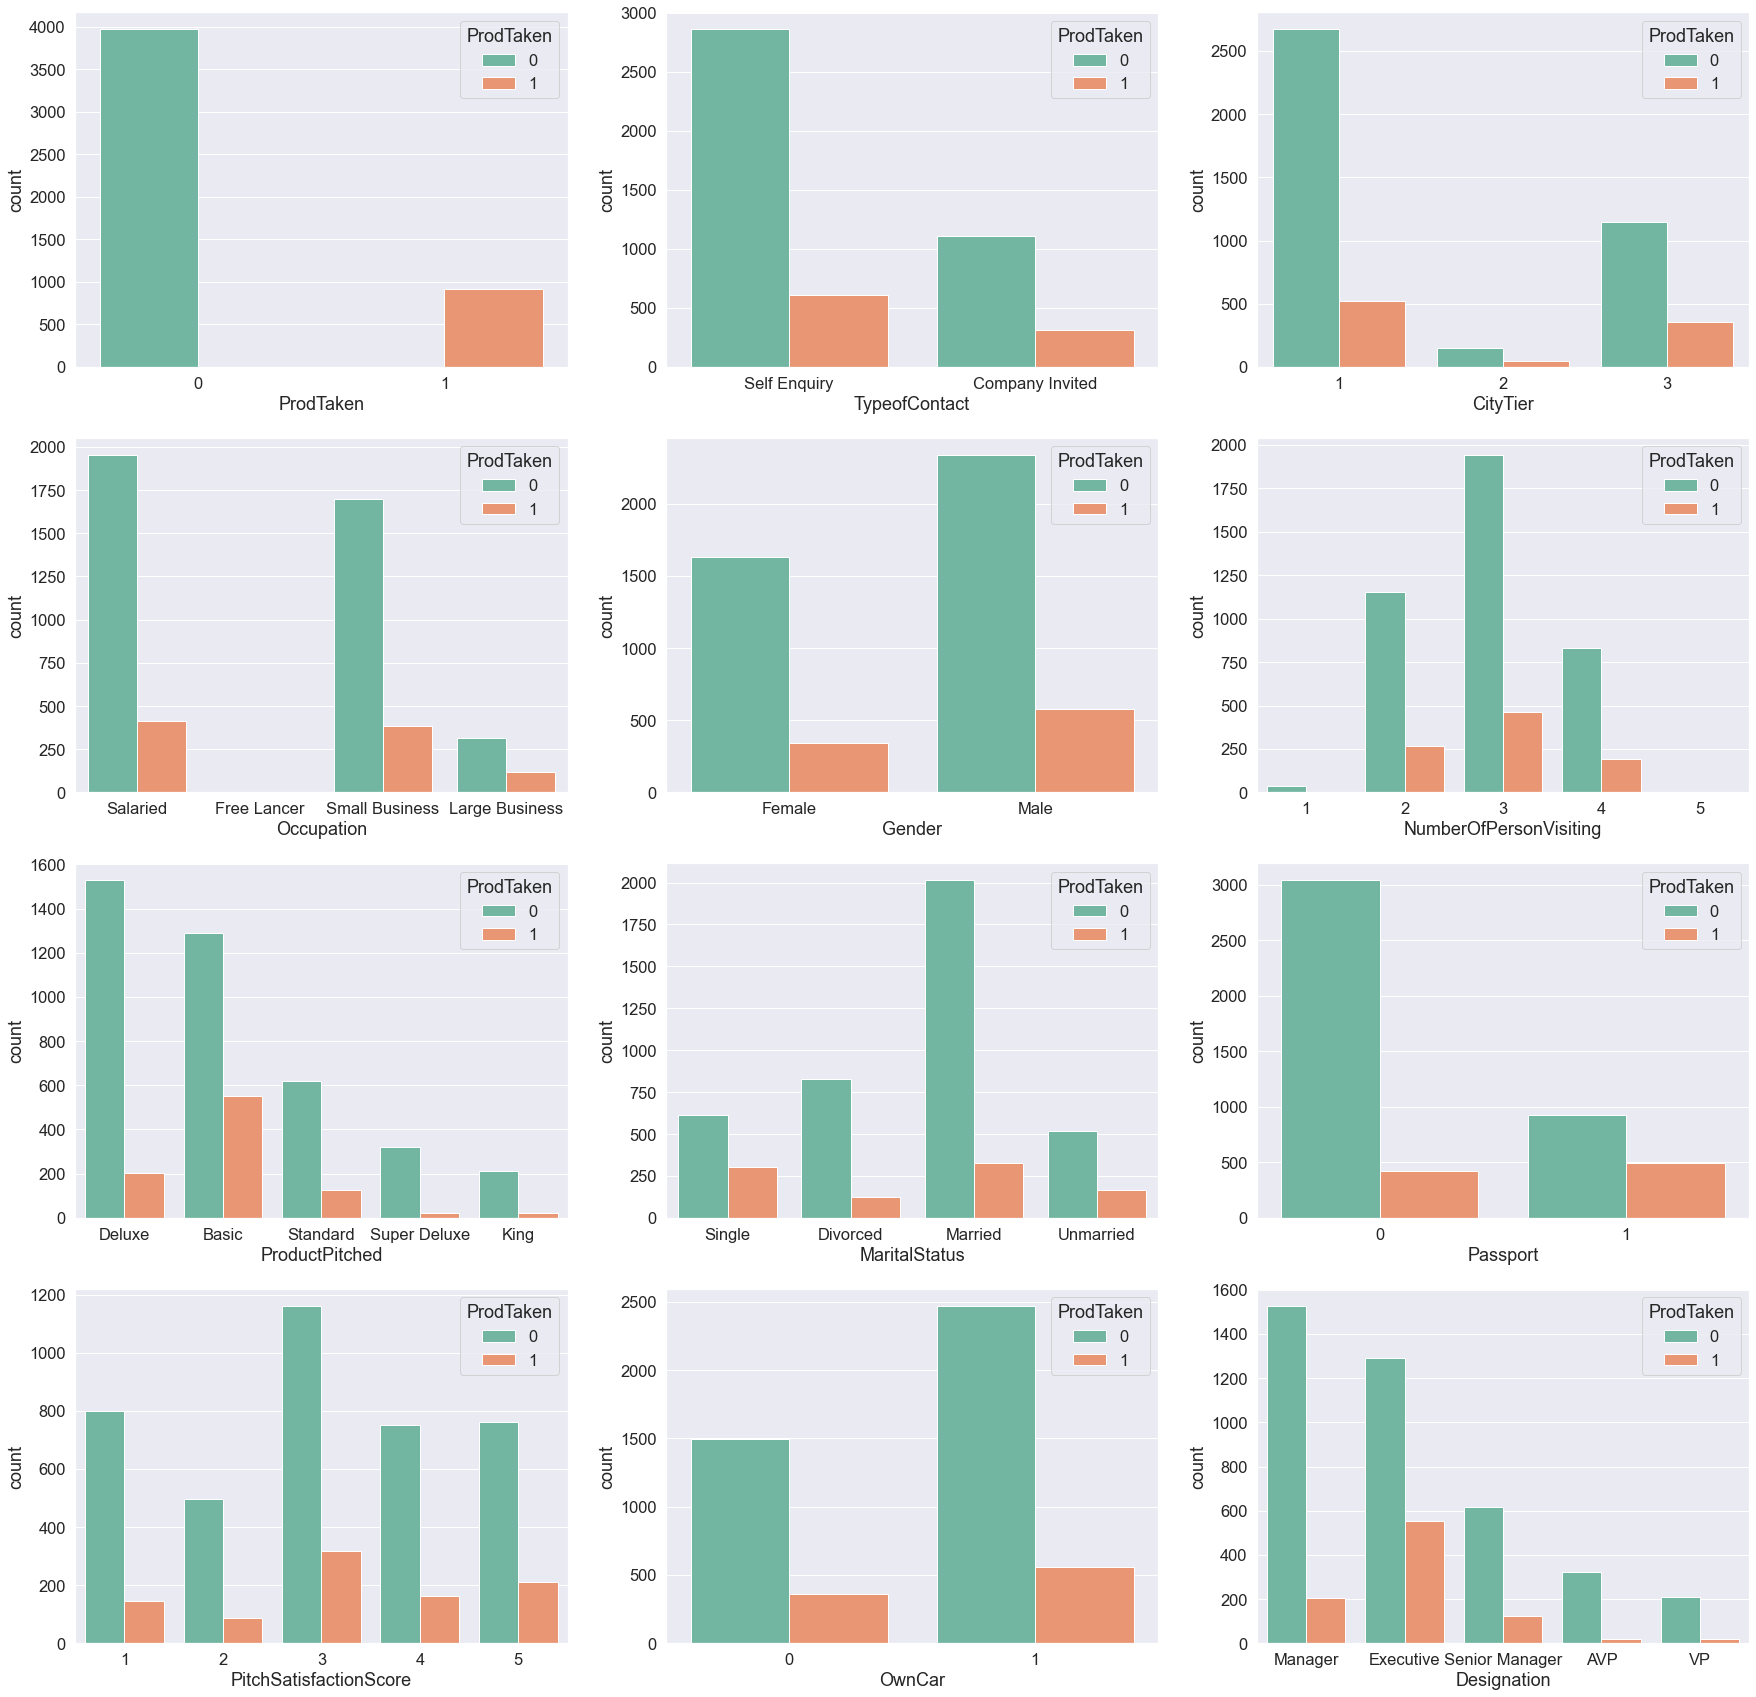

In [ ]:
categorical_dfx = pd.DataFrame()
for col in df.select_dtypes(include=['object','int64']):
    categorical_dfx[col] = dfx[col]
fig, ax = plt.subplots(4,3, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in categorical_dfx: 
    sns.countplot(categorical_dfx[col], hue=dfx["ProdTaken"], ax=ax[i//3][i%3],palette=("Set2")
)
    
    i=i+1
plt.show()

There are 9 categorical features.As seen graphs,the number of products received is quite low compared to those that were not purchased.<br>The customers are invited with company they are more likely to buy holiday packages.<br>Moreover, occupation,passport and marital status have a high impact of the purchased packages. 

# Continuous Features

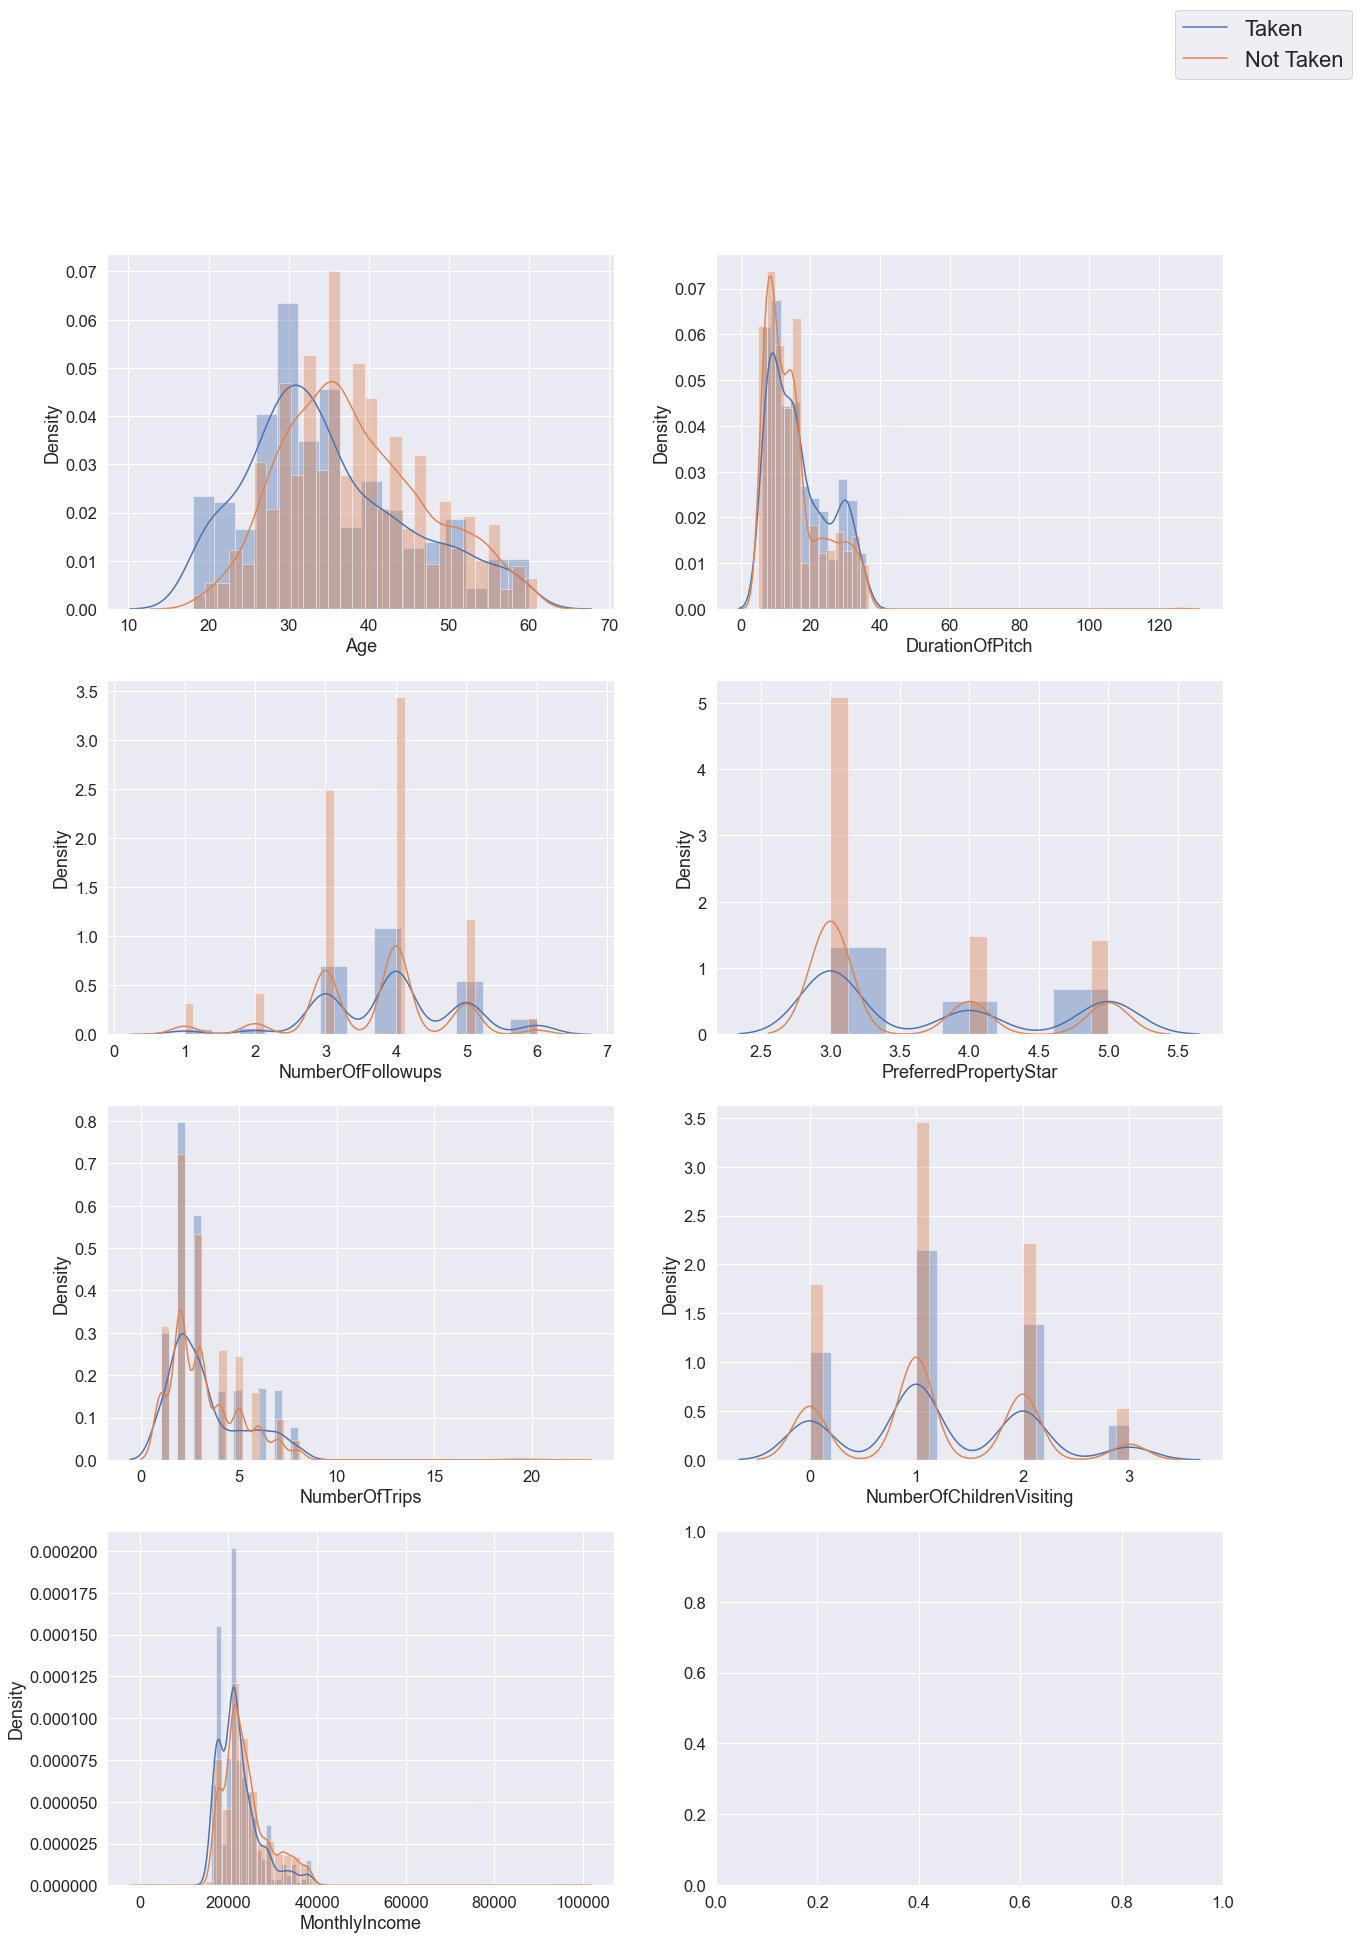

In [ ]:
numeric_df = df.copy()
for col in categorical_dfx:
    numeric_df = numeric_df.drop(col,axis=1)
target = pd.DataFrame()
target['ProdTaken'] = df['ProdTaken'].map({0:'Not Taken',1:'Taken'})

taken_df = numeric_df[target['ProdTaken']=="Taken"]
not_taken_df = numeric_df[target['ProdTaken']=="Not Taken"]
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(4,2, figsize=(20,30))
i=0
for col in numeric_df:
    sns.distplot(taken_df[col],label='Taken',ax=ax[i//2][i%2])
    sns.distplot(not_taken_df[col],label='Not Taken',ax=ax[i//2][i%2])
    i=i+1
fig.legend(labels=['Taken','Not Taken'],fontsize='22')
fig.show()

When we check the age we can see that the mean value of the age densities show that the ones reject to buy the product has higher age mean.<br>
There is no significant clue that duration has negative or positive impact in given range.<br>
Number of follow ups shows that the 3-5 calls are generally required to complete sales process either negative or positive.<br>
We are seeing that preffered property star with 5 stars are generally easier to sell to the correct customer segment.<br>
Customers'monthly ıncome is seen distribution between  15000 and 40000.



# Business Questions

## 1) What percentage of customers have purchased the holiday package?

In [ ]:
dfx['ProdTaken'].mean()
print(df['ProdTaken'].sum()*100/df['ProdTaken'].count(),'%')

18.821603927986907 %


In 2020 , only 18% of called customers bought the product.

## 2) How many of each package were purchased?

In [ ]:
print(dfx.groupby("ProductPitched")["ProdTaken"].sum())

ProductPitched
Basic           552
Deluxe          204
King             20
Standard        124
Super Deluxe     20
Name: ProdTaken, dtype: int64


The most preffered holiday package by costumer was Basic.

## 3) Which city category did most of the customers who buy packages live in?

In [ ]:
print(dfx.groupby("CityTier")["ProdTaken"].sum()/dfx.groupby("CityTier")["ProdTaken"].count())



CityTier
1    0.163009
2    0.232323
3    0.236000
Name: ProdTaken, dtype: float64


<AxesSubplot:xlabel='CityTier', ylabel='Count'>

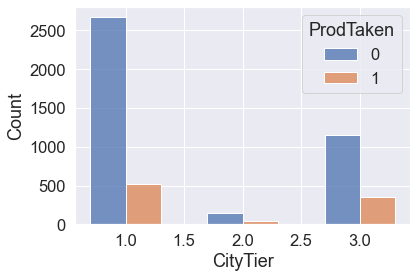

In [ ]:
sns.histplot(dfx, x="CityTier", hue="ProdTaken", multiple="dodge", shrink=.6, discrete=True)


The most of the customers who purchased product live in city tier 3 an 2. Their rate is too close so it can be thought together to target customer profil. 

## 4) Which property star was the most preferred?

In [ ]:
star_taken=dfx.groupby(["PreferredPropertyStar"])[["ProdTaken"]].sum()
star_total=dfx.groupby(["PreferredPropertyStar"])[["ProdTaken"]].count()

print(star_taken/star_total*100)


                       ProdTaken
PreferredPropertyStar           
3.0                    16.164293
4.0                    19.934283
5.0                    26.150628


The most of the called customers preferred propertystar 5 with 26.15%.

## 5) In which income range are the customers who bought the product?

At first to see income range of costumers, the column of ıncome was divided certain ranges .

In [ ]:
labels = ["{0} - {1}".format(i, i + 5000) for i in range(15000, 45000, 5000)]
dfx["Monthly_BIN"] = pd.cut(dfx.MonthlyIncome, range(15000, 46000, 5000), right=False, labels=labels)


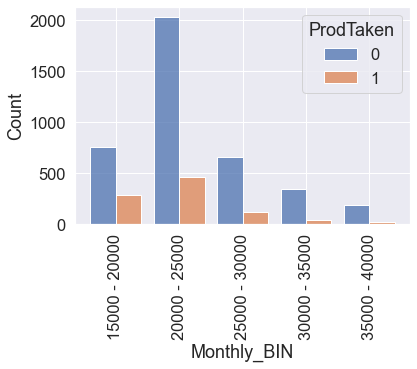

In [ ]:
ax=sns.histplot(dfx, x="Monthly_BIN", hue="ProdTaken", multiple="dodge", shrink=.8, discrete=True)
ax.tick_params(axis='x', rotation=90)

In [ ]:
print(round(100*dfx.groupby("Monthly_BIN")["ProdTaken"].sum()/dfx.groupby("Monthly_BIN")["ProdTaken"].count()))


Monthly_BIN
15000 - 20000    27.0
20000 - 25000    18.0
25000 - 30000    15.0
30000 - 35000    10.0
35000 - 40000    10.0
40000 - 45000     NaN
Name: ProdTaken, dtype: float64


As we see in the graph, the ıncome range of customer who purchased the products is between 15000 and 40000.However, ,the highest rate with 27% is seen among the customers have 15000-20000 monthly ıncome.

## 6) In which age range did customer buy packages the most?

Because there isn't age range in the dataset , firstly the ages was divided certain range and then was showed with hisplot graph.

In [ ]:
Age_dic = {'18-25':[],'25-30':[],'30-35':[],'35-40':[],'40-50':[],'50+':[]}
dfx['Age_BIN'] = dfx['Age']
for i in range(len(dfx)) : 
    if dfx['Age'].iloc[i] < 25:
        Age_dic['18-25'].append(i)
        dfx['Age_BIN'].iloc[i] = '18-25'
    elif dfx['Age'].iloc[i] < 30:
        Age_dic['25-30'].append(i)
        dfx['Age_BIN'].iloc[i] = '25-30'
    elif dfx['Age'].iloc[i] < 35:
        Age_dic['30-35'].append(i)
        dfx['Age_BIN'].iloc[i] = '30-35'
    elif dfx['Age'].iloc[i] < 40:
        Age_dic['35-40'].append(i)
        dfx['Age_BIN'].iloc[i] = '35-40'
    elif dfx['Age'].iloc[i] < 50:
        Age_dic['40-50'].append(i)
        dfx['Age_BIN'].iloc[i] = '40-50'
    else:
        Age_dic['50+'].append(i)
        dfx['Age_BIN'].iloc[i] = '50+'
    
dfx.sort_values(by='Age_BIN', ascending=True,inplace=True)


<AxesSubplot:xlabel='Age_BIN', ylabel='Count'>

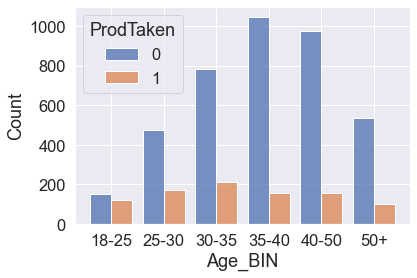

In [ ]:
sns.histplot(dfx, x="Age_BIN", hue="ProdTaken", multiple="dodge", shrink=.8, discrete=True)

In [ ]:
print(round(100*dfx.groupby("Age_BIN")["ProdTaken"].sum()/dfx.groupby("Age_BIN")["ProdTaken"].count()),)
    

Age_BIN
18-25    45.0
25-30    26.0
30-35    21.0
35-40    13.0
40-50    14.0
50+      16.0
Name: ProdTaken, dtype: float64


The holiday packages was bought the mostly by the group of 18-25 ages with 45%.

## 7) Examine the customers who purchased the packages according to their Marital status, gender, occupation status.Which type of customer purchased the most ?

At first , the dataset was created as a new dataframe accordinly taken product.After then, it showed costumer number who purcased product according to the three profile.

In [ ]:
dfy=dfx[dfx["ProdTaken"] == 1]       
dfy[["Gender","Occupation","MaritalStatus"]]


,Gender,Occupation,MaritalStatus
2298,Male,Small Business,Single
4041,Male,Small Business,Single
663,Female,Salaried,Single
662,Female,Small Business,Single
4645,Female,Small Business,Unmarried
...,...,...,...
528,Male,Large Business,Divorced
3410,Female,Small Business,Divorced
3905,Male,Small Business,Married
2972,Male,Large Business,Divorced


In [ ]:
print(round(100*dfx.groupby("Gender")["ProdTaken"].sum()/dfx.groupby("Gender")["ProdTaken"].count()))

print(round(100*dfx.groupby("MaritalStatus")["ProdTaken"].sum()/dfx.groupby("MaritalStatus")["ProdTaken"].count()))

print(round(100*dfx.groupby("Occupation")["ProdTaken"].sum()/dfx.groupby("Occupation")["ProdTaken"].count()))



Gender
Female    17.0
Male      20.0
Name: ProdTaken, dtype: float64
MaritalStatus
Divorced     13.0
Married      14.0
Single       33.0
Unmarried    24.0
Name: ProdTaken, dtype: float64
Occupation
Free Lancer       100.0
Large Business     28.0
Salaried           17.0
Small Business     18.0
Name: ProdTaken, dtype: float64


<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

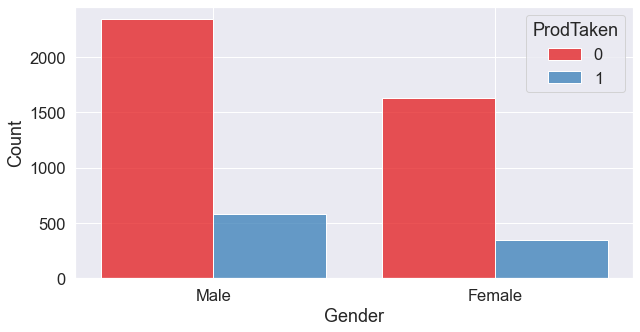

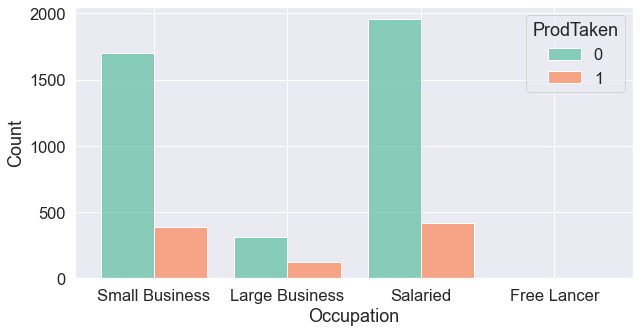

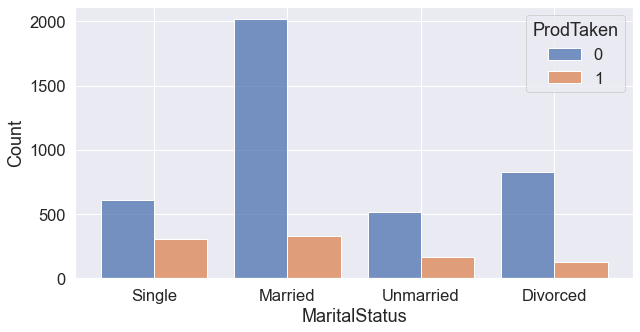

In [ ]:

plt.figure(figsize=(10,5))
sns.histplot(dfx, x="Gender", hue="ProdTaken", multiple="dodge", shrink=.8, discrete=True,palette='Set1')
plt.figure(figsize=(10,5))
sns.histplot(dfx, x="Occupation", hue="ProdTaken", multiple="dodge", shrink=.8, discrete=True, palette='Set2')
plt.figure(figsize=(10,5))
sns.histplot(dfx, x="MaritalStatus", hue="ProdTaken", multiple="dodge", shrink=.8, discrete=True)

When we look at the percentage and graphs;
Male customers with the rate of 20% has bought the holiday package more than female.
Single customers with the rate of 33% has preferred the holiday package more.
In terms of occupation , there is only one customer as a freelancer so its rate is 100%. We won't evaluate because it has not enough data to evaluate as a statistical.In the circumstances the customers who have a large business is mostly(28%) bought the packages.
                            

## 8) Were the customers called equally frequent ?

In [ ]:
A = df[df.ProdTaken == 0].groupby('NumberOfFollowups',as_index = 0)[['NumberOfFollowups']].count()
#A.index.name = 'NumOFFollowups'
A.rename(columns={"NumberOfFollowups":"COUNT"},inplace=1)
A['percent'] = round((A['COUNT']/A['COUNT'].sum())*100,2)
A.index.name = 'NumOFFollowups'
A


,COUNT,percent
NumOFFollowups,,
0,156,3.97
1,205,5.21
2,1222,31.09
3,1689,42.97
4,577,14.68
5,82,2.09


461 customer was called only one or two.It means a potential customer of total with 9.18 % (3.97+5.21) is seen here. (https://myoperator.com/blog/important-follow-up-with-your-customers)

## 9) What is the target customer for the new deluxe holiday package?

The new dataframe was created to see the customers who purcahased deluxe package. Then,to understand a target customer, customer's features was visulized by using countplot.

In [ ]:
Deluxe_est=dfy.copy()   
Deluxe_est=Deluxe_est[Deluxe_est["ProductPitched"]=='Deluxe']
Deluxe_est.round()
Deluxe_est['NumberOfTrips']=Deluxe_est['NumberOfTrips'].astype('int64')

<AxesSubplot:xlabel='Age_BIN', ylabel='count'>

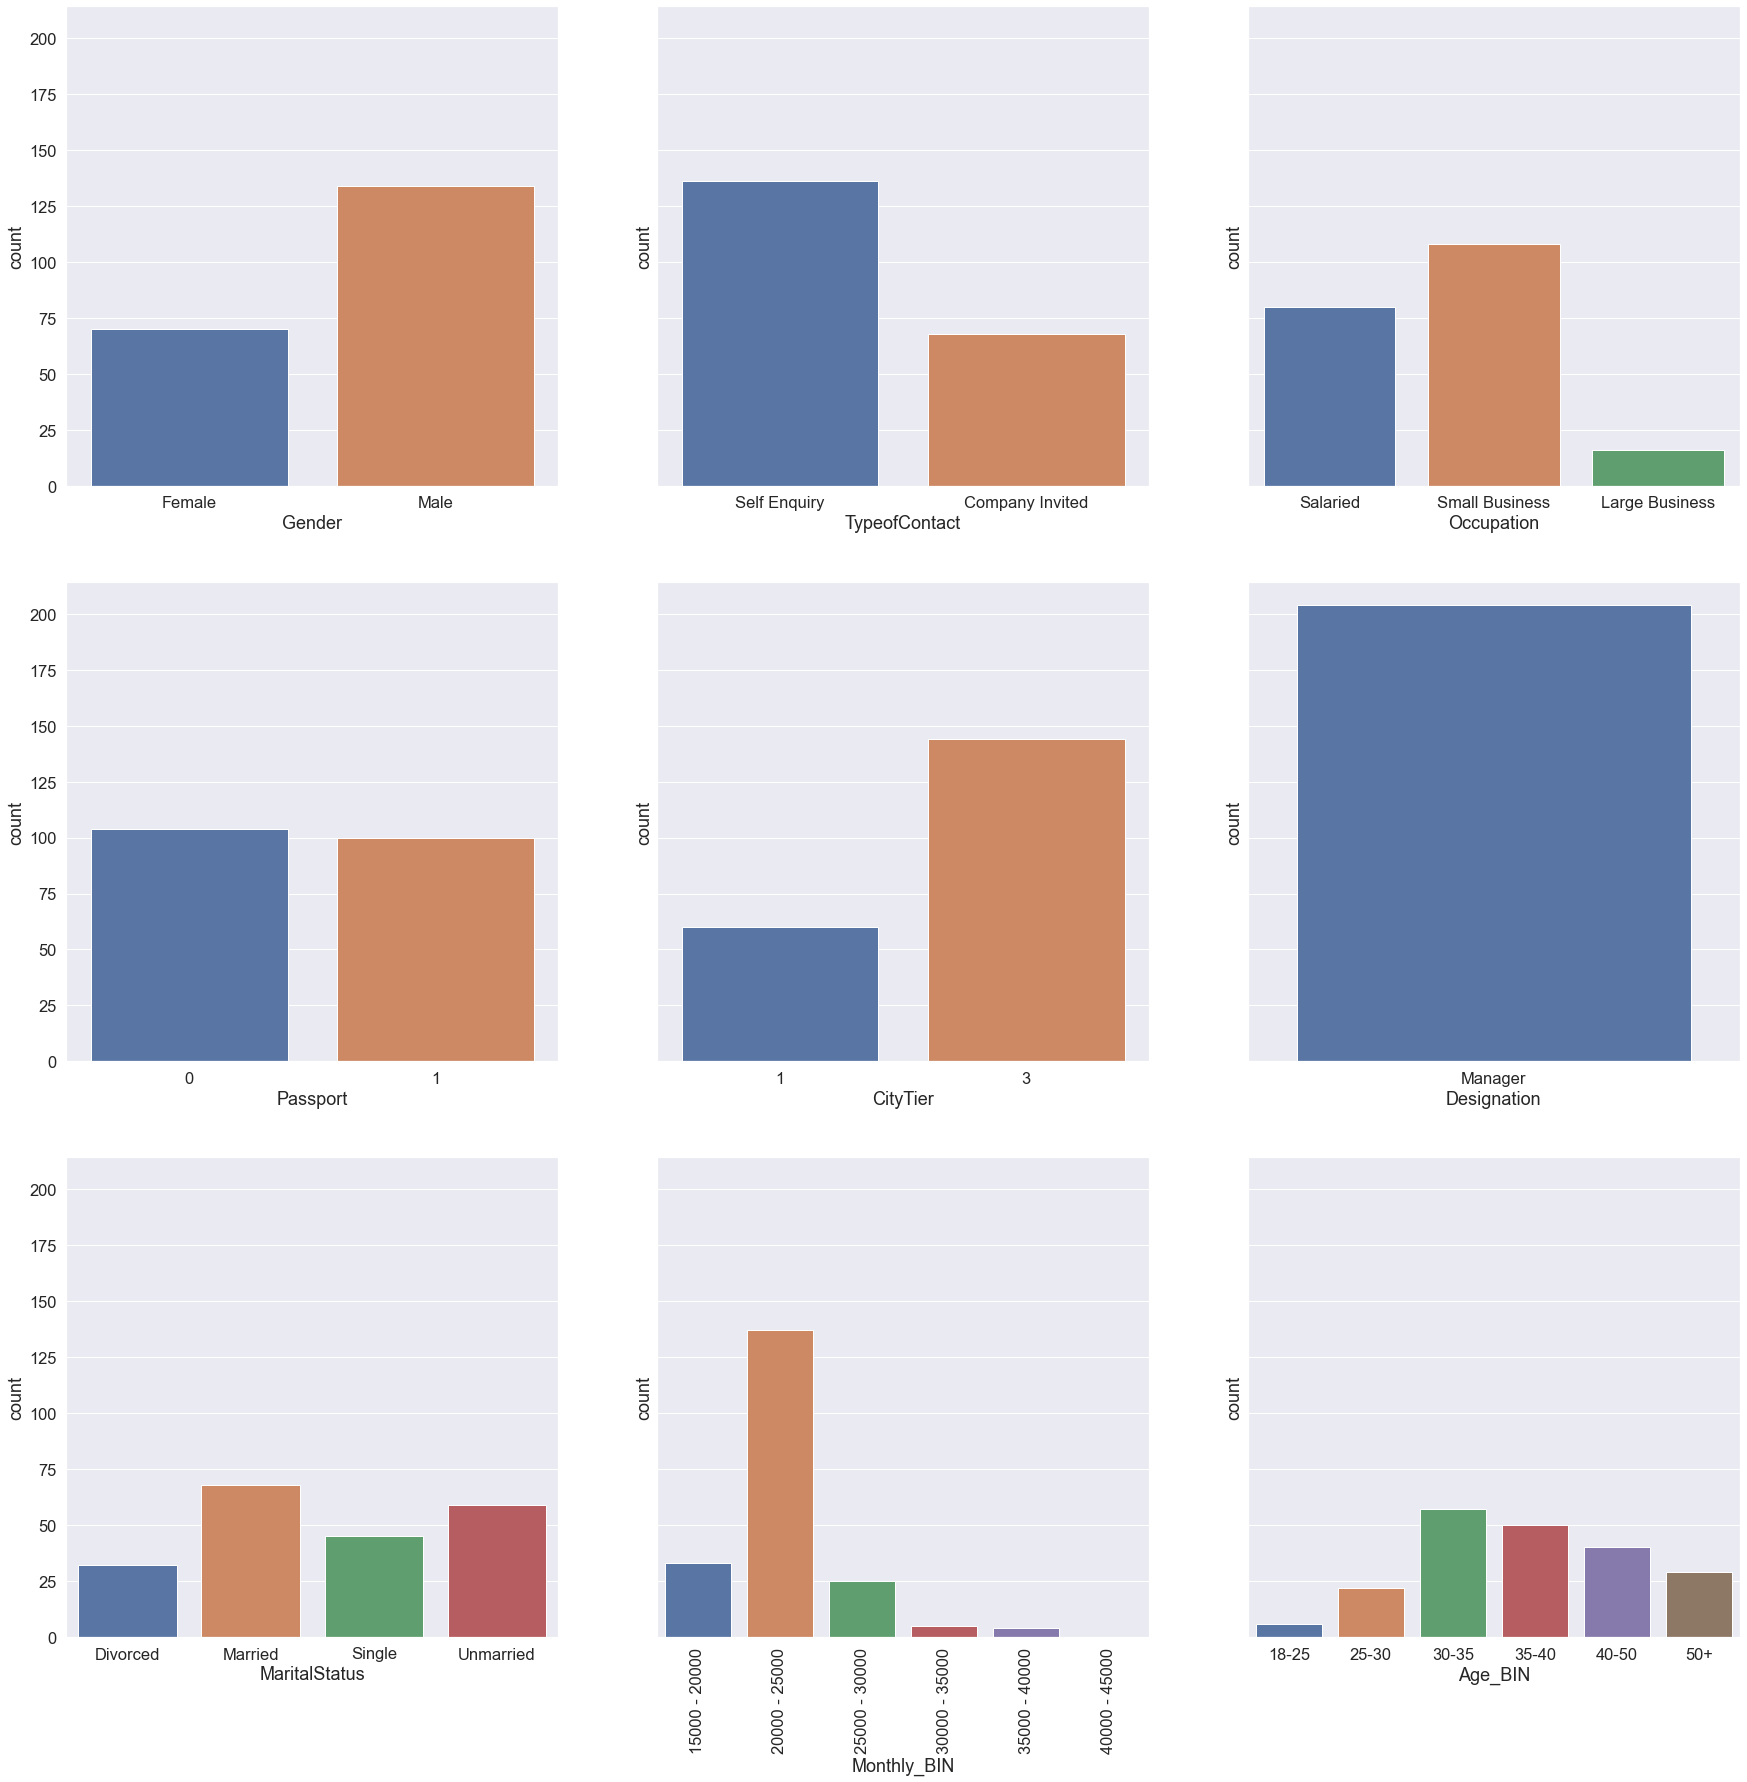

In [ ]:

fig, axes = plt.subplots(3,3, figsize=(30,30), sharey=True)
sns.countplot(ax=axes[0,0],x="Gender",  data=Deluxe_est)    
sns.countplot(ax=axes[0,1],x="TypeofContact",  data=Deluxe_est)
sns.countplot(ax=axes[0,2],x="Occupation",  data=Deluxe_est)
sns.countplot(ax=axes[1,0],x="Passport",  data=Deluxe_est)
sns.countplot(ax=axes[1,1],x="CityTier",  data=Deluxe_est)
sns.countplot(ax=axes[1,2],x="Designation",  data=Deluxe_est)
sns.countplot(ax=axes[2,0],x="MaritalStatus",  data=Deluxe_est)
ay=sns.countplot(ax=axes[2,1],x="Monthly_BIN",  data=Deluxe_est)
ay.tick_params(axis='x', rotation=90)
sns.countplot(ax=axes[2,2],x="Age_BIN",  data=Deluxe_est)


All customer features has evalueted separately.

According to graphics deluxe package was mostly preferred by male, married people as well as 30-35 age.
The customers who have monthly ıncome 20000-25000 and is manager has choosed deluxe package.
There is almost no difference in preference between customers with and without a passport.
There is no significant difference in terms of number of trips.

The target customer should be:<br>
-Male<br>
-Married and unmarried    (because the number of  married customer and unmarried customer is too close.So the target should be aimed together.<br>
-From city tier 3 <br>
-The range of age 30-35 and 35-40 have a small difference and both age count is high.That's why the target should be
should be the target customers age for the company. <br>
Having a passport is not critical feature for deluxe package.

# DISCUSSION AND CONCLUSION

In this dataset , there are approximetly 5% missing value in the some variables such as monthlyincome ,age and durationofpitch. To deal with this missing data I used some imputation technique instead of deleting.Moreover,the classes were unbalanced that means the number of called customer profile wasn't distribute equally. That's why although I analyzed the spesific data which required by client as percentage , the results won't be certain estimate for target customer in new packages.For the best estimation to find a target customer, the machine learning algorithms should be used.